# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [113]:
#!pip install tensorflow --user
#!pip install keras --user


Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np

2025-03-14 11:14:08.059227: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

/var/folders/zl/x4wcpc6n7p75fkkmssl2_0vh0000gn/T/ipykernel_26144/3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


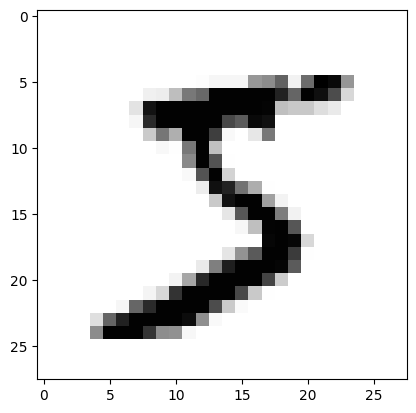

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [6]:
0/255

0.0

In [7]:
128/255

0.5019607843137255

In [8]:
255/255

1.0

In [9]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [10]:
np.mean(X_train)

0.13066062

In [11]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [13]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [15]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [17]:
print(model.layers[0])

<Flatten name=flatten_1, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [18]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [65]:
#weights

In [21]:
28*28

784

In [22]:
len(weights[0])

300

In [23]:
28*28

784

In [24]:
300*784

235200

In [25]:
weights.size

235200

In [26]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [27]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [28]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [29]:
784*300 + 300

235500

In [30]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
300*28*28 + 300


235500

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [32]:
X_train.shape

(50000, 28, 28)

In [33]:
50000/128

390.625

In [34]:
50000/128

390.625

In [35]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50


391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5603 - loss: 1.6804 - val_accuracy: 0.8680 - val_loss: 0.5791
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8650 - loss: 0.5475 - val_accuracy: 0.9002 - val_loss: 0.3876
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8904 - loss: 0.4059 - val_accuracy: 0.9113 - val_loss: 0.3311
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9030 - loss: 0.3507 - val_accuracy: 0.9171 - val_loss: 0.3030
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9107 - loss: 0.3224 - val_accuracy: 0.9215 - val_loss: 0.2825
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9153 - loss: 0.3008 - val_accuracy: 0.9264 - val_loss: 0.2648
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9219 - loss: 0.2828 - val_accuracy: 0.9301 - val_loss: 0.2537
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9246 - loss: 0.2687 - val_accuracy: 0.9337 - v

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [36]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9781 - loss: 0.0814 - val_accuracy: 0.9703 - val_loss: 0.1057
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9786 - loss: 0.0779 - val_accuracy: 0.9699 - val_loss: 0.1045
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9794 - loss: 0.0786 - val_accuracy: 0.9715 - val_loss: 0.1014
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9793 - loss: 0.0759 - val_accuracy: 0.9724 - val_loss: 0.1006
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9803 - loss: 0.0707 - val_accuracy: 0.9720 - val_loss: 0.0999
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9809 - loss: 0.0682 - val_accuracy: 0.9720 - val_loss: 0.0974
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9831 - loss: 0.0635 - val_accuracy: 0.9723 - val_loss: 0.1011
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9835 - loss: 0.0627 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [37]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 'auto', 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'accuracy': [0.7229800224304199,
  0.8737599849700928,
  0.8940600156784058,
  0.9048200249671936,
  0.9116799831390381,
  0.9164400100708008,
  0.9220600128173828,
  0.9255200028419495,
  0.9282400012016296,
  0.9319199919700623,
  0.9348800182342529,
  0.9380599856376648,
  0.9395400285720825,
  0.9416400194168091,
  0.9442800283432007,
  0.9458000063896179,
  0.9474400281906128,
  0.9488999843597412,
  0.9503600001335144,
  0.9521600008010864,
  0.9533200263977051,
  0.9549400210380554,
  0.9561799764633179,
  0.9574199914932251,
  0.9583799839019775,
  0.9597799777984619,
  0.9609400033950806,
  0.9617599844932556,
  0.9628400206565857,
  0.9641199707984924,
  0.9646999835968018,
  0.965719997882843,
  0.9666600227355957,
  0.9672399759292603,
  0.9679200053215027,
  0.9692000150680542,
  0.969980001449585,
  0.9706400036811829,
  0.9714800119400024,
  0.971560001373291,
  0.9722800254821777,
  0.9735000133514404,
  0.9738799929618835,
  0.9739800095558167,
  0.9747400283813477,
 

In [38]:
history.history

{'accuracy': [0.7229800224304199,
  0.8737599849700928,
  0.8940600156784058,
  0.9048200249671936,
  0.9116799831390381,
  0.9164400100708008,
  0.9220600128173828,
  0.9255200028419495,
  0.9282400012016296,
  0.9319199919700623,
  0.9348800182342529,
  0.9380599856376648,
  0.9395400285720825,
  0.9416400194168091,
  0.9442800283432007,
  0.9458000063896179,
  0.9474400281906128,
  0.9488999843597412,
  0.9503600001335144,
  0.9521600008010864,
  0.9533200263977051,
  0.9549400210380554,
  0.9561799764633179,
  0.9574199914932251,
  0.9583799839019775,
  0.9597799777984619,
  0.9609400033950806,
  0.9617599844932556,
  0.9628400206565857,
  0.9641199707984924,
  0.9646999835968018,
  0.965719997882843,
  0.9666600227355957,
  0.9672399759292603,
  0.9679200053215027,
  0.9692000150680542,
  0.969980001449585,
  0.9706400036811829,
  0.9714800119400024,
  0.971560001373291,
  0.9722800254821777,
  0.9735000133514404,
  0.9738799929618835,
  0.9739800095558167,
  0.9747400283813477,
 

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.72298,1.209267,0.8680,0.579133
1,0.87376,0.501137,0.9002,0.387602
2,0.89406,0.390832,0.9113,0.331051
3,0.90482,0.344322,0.9171,0.303045
4,0.91168,0.315959,0.9215,0.282547
5,0.91644,0.294830,0.9264,0.264752
6,0.92206,0.277891,0.9301,0.253701
7,0.92552,0.263938,0.9337,0.241765
8,0.92824,0.251351,0.9340,0.234733
9,0.93192,0.240120,0.9390,0.223857


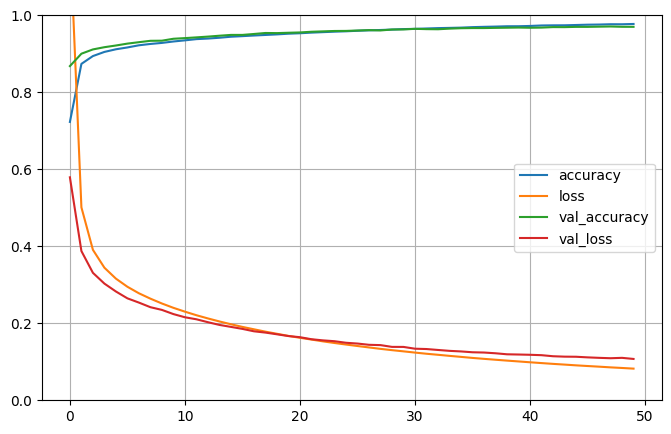

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [42]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.1043


[0.09116246551275253, 0.9724000096321106]

/var/folders/zl/x4wcpc6n7p75fkkmssl2_0vh0000gn/T/ipykernel_26144/1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


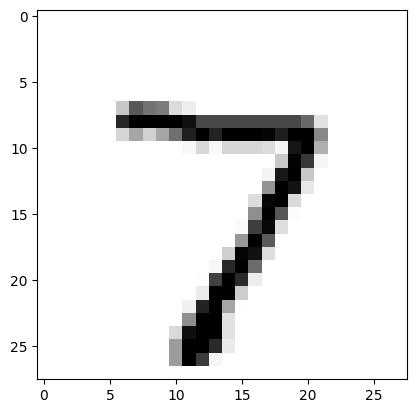

In [43]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [44]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [45]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [46]:
predictions.argmax()

7

In [47]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [48]:
y_test[0]

7.0

/var/folders/zl/x4wcpc6n7p75fkkmssl2_0vh0000gn/T/ipykernel_26144/1084033691.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


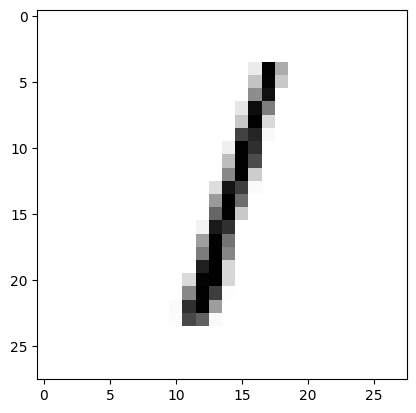

In [49]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [50]:
#housing.keys()

In [69]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tf.config.run_functions_eagerly(True)

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [70]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [71]:
X_train.shape

(11610, 8)

In [72]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_valid)))
print(np.any(np.isnan(X_test)))

False
False
False


Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [73]:
X_train.shape

(11610, 8)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(clipnorm=1)

model.compile(loss = "mean_squared_error",
             optimizer = optimizer) # con optimizer = "sgd" aparece la explosión del gradiente y nan's 

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 1.9511 - val_loss: 0.5457
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.5583 - val_loss: 0.4760
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 0.5168 - val_loss: 0.4524
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - loss: 0.5171 - val_loss: 0.4398
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.4967 - val_loss: 0.4266
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - loss: 0.4653 - val_loss: 0.4186
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.4578 - val_loss: 0.4108
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - loss: 0.4616 - val_loss: 0.4061
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 0.4427 - val_loss: 0.4037
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.4067 - val_loss: 0.3979
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - loss: 0.4185 - val_loss: 0.3926
Epoch 12/20
363/363 ━━━━━━━━━━

In [75]:
8*30 + 30

270

In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [77]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3815
0.3855123221874237


In [78]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[2.5858588],
       [1.477194 ],
       [1.1415502],
       [1.1022723],
       [2.328269 ]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [79]:
model.save("my_keras_model.h5")

In [80]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

El optimizador que se usó para compilar el modelo contiene estado interno (por ejemplo, acumuladores de gradiente) que ya no coincide con las variables actuales del modelo. 

In [86]:
# Crear una nueva instancia del optimizador
new_optimizer = keras.optimizers.SGD(clipnorm=1, learning_rate=0.01)

# Recompilar el modelo con el nuevo optimizador
model.compile(loss="mean_squared_error", optimizer=new_optimizer)

In [87]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   callbacks = [checkpoint_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3825

363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 0.3825
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3758

363/363 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - loss: 0.3758
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3835

363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.3835
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3773

363/363 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - loss: 0.3773
Epoch 5/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3895

363/363 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - loss: 0.3894
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3710

363/363 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - loss: 0.3710
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3832

363/363 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - loss: 0.3832
Epoch 8/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3625

363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.3626
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3670

363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.3670
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3630

363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.3630
Epoch 11/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3525

363/363 ━━━━━━━━━━━━━━━━━━━━ 57s 103ms/step - loss: 0.3526
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3604

363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.3604
Epoch 13/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3708

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.3707
Epoch 14/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3638

363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 0.3638
Epoch 15/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3615

363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - loss: 0.3614
Epoch 16/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3622

363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.3621
Epoch 17/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3581

363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.3581
Epoch 18/20
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3438

363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.3438
Epoch 19/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3604

363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.3603
Epoch 20/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3510

363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.3510


### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [110]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3366 - val_loss: 0.3556
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3356 - val_loss: 0.3625
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.3562
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3583
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3341 - val_loss: 0.3520
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 0.3556
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 0.3512
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 0.3579
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3324 - val_loss: 0.3559
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3309 - val_loss: 0.3505